In [ ]:

import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
crop = pd.read_csv('/content/Crop_data.csv')

In [ ]:
crop.iloc[600]

,600
N,19
P,55
K,20
temperature,27.433294
humidity,87.805077
ph,7.185301
rainfall,54.733676
label,mungbean


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
corr=crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
crop.label.value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['label'].unique().size

22

In [ ]:
# Add Temperature Categories as we did earlier
temp_conditions = [
    (crop['temperature'] < -10),
    (crop['temperature'] >= -10) & (crop['temperature'] < 0),
    (crop['temperature'] >= 0) & (crop['temperature'] < 5),
    (crop['temperature'] >= 5) & (crop['temperature'] < 15),
    (crop['temperature'] >= 15) & (crop['temperature'] < 20),
    (crop['temperature'] >= 20) & (crop['temperature'] < 25),
    (crop['temperature'] >= 25) & (crop['temperature'] < 30),
    (crop['temperature'] >= 30) & (crop['temperature'] < 35),
    (crop['temperature'] >= 35)
]

temp_categories = ['Freezing', 'Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot', 'Extreme Heat']

crop['temperature Category'] = np.select(temp_conditions, temp_categories, default='Unknown')

In [ ]:
# Define thresholds for rainfall categories
rainfall_conditions = [
    (crop['rainfall'] == 0),
    (crop['rainfall'] > 0) & (crop['rainfall'] <= 2.5),
    (crop['rainfall'] > 2.5) & (crop['rainfall'] <= 7.5),
    (crop['rainfall'] > 7.5) & (crop['rainfall'] <= 15),
    (crop['rainfall'] > 15) & (crop['rainfall'] <= 30),
    (crop['rainfall'] > 30)
]

# Define the corresponding rainfall categories
rainfall_categories = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Very Heavy Rain', 'Extreme Rain']

# Create a new column for rainfall categories
crop['rainfall Category'] = np.select(rainfall_conditions, rainfall_categories, default='Unknown')

print(crop)

        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

     temperature Category rainfall Category  
0                    Warm      Extreme Rain  
1      

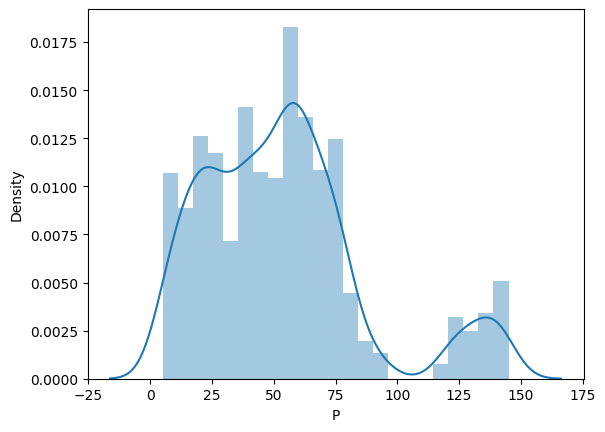

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(crop['P'])
plt.show()

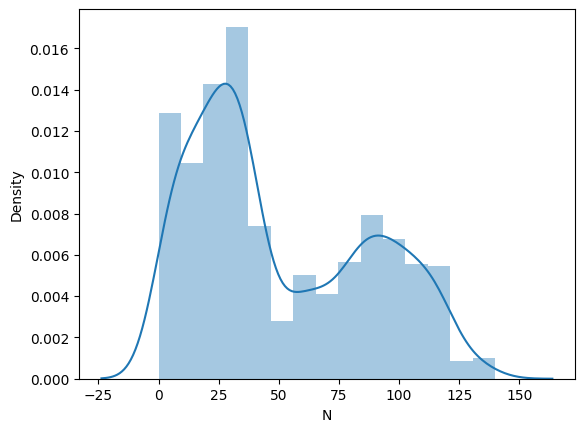

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['temperature Category'].unique()

array(['Warm', 'Hot', 'Mild', 'Extreme Heat', 'Very Hot', 'Cool'],
      dtype=object)

In [ ]:
crop['rainfall Category'].unique()

array(['Extreme Rain', 'Very Heavy Rain'], dtype=object)

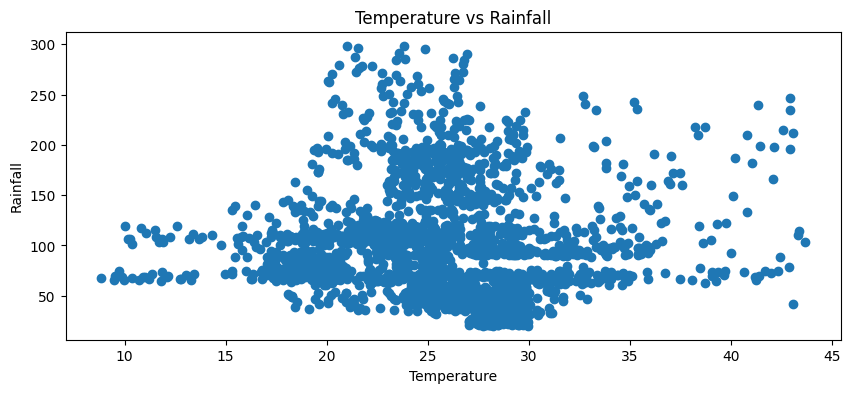

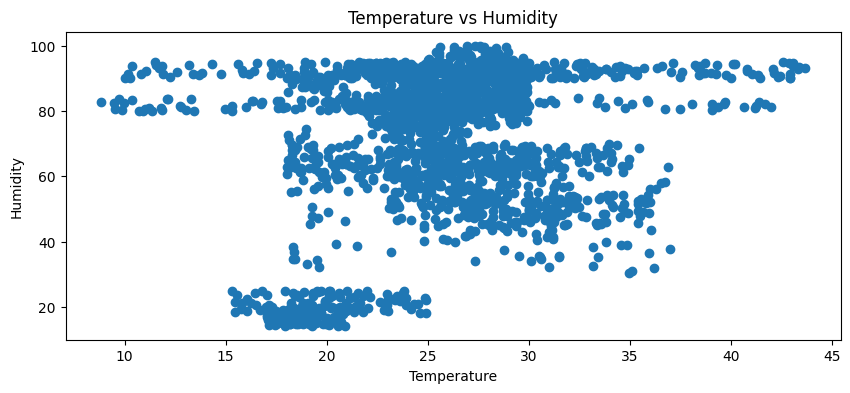

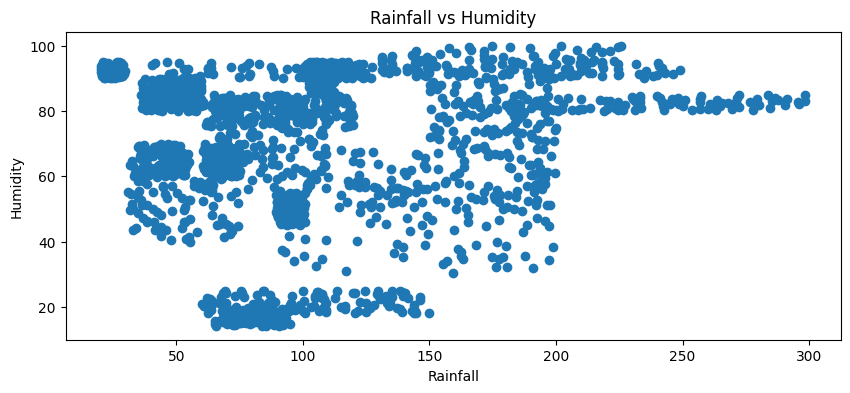

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Temperature vs Rainfall
plt.figure(figsize=(10, 4))
plt.scatter(crop['temperature'], crop['rainfall'])
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Temperature vs Rainfall')
plt.show()

# Scatter plot for Temperature vs Humidity
plt.figure(figsize=(10, 4))
plt.scatter(crop['temperature'], crop['humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.show()

# Scatter plot for Rainfall vs Humidity
plt.figure(figsize=(10, 4))
plt.scatter(crop['rainfall'], crop['humidity'])
plt.xlabel('Rainfall')
plt.ylabel('Humidity')
plt.title('Rainfall vs Humidity')
plt.show()

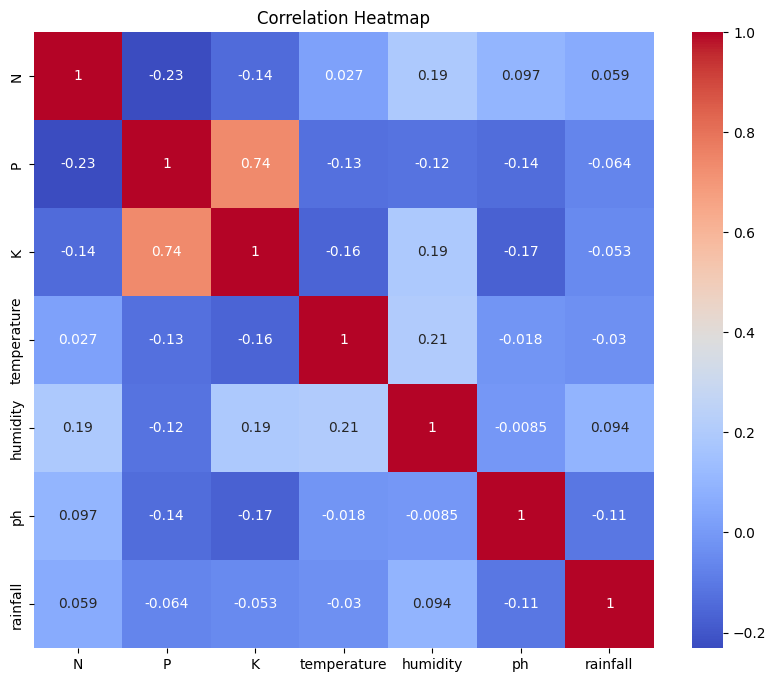

In [ ]:
# Correlation heatmap
numeric_df = crop.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Define your original crop dictionary for crops
crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22
}

# Create reverse dictionaries for rainfall and temperature categories
rainfall_dict = {
    'No Rain': 0,
    'Light Rain': 1,
    'Moderate Rain': 2,
    'Heavy Rain': 3,
    'Very Heavy Rain': 4,
    'Extreme Rain': 5
}

temperature_dict = {
    'Freezing': 0,
    'Very Cold': 1,
    'Cold': 2,
    'Cool': 3,
    'Mild': 4,
    'Warm': 5,
    'Hot': 6,
    'Very Hot': 7,
    'Extreme Heat': 8
}

# Decode rainfall and temperature categories
crop['Decoded label'] = crop['label'].map(crop_dict)
crop['Decoded Rainfall Category'] = crop['rainfall Category'].map(rainfall_dict)
crop['Decoded Temperature Category'] = crop['temperature Category'].map(temperature_dict)

print(crop)

        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

     temperature Category rainfall Category  Decoded label  \
0                    Warm      Extrem

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,temperature Category,rainfall Category,Decoded label,Decoded Rainfall Category,Decoded Temperature Category
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Warm,Extreme Rain,1,5,5
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Warm,Extreme Rain,1,5,5
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Warm,Extreme Rain,1,5,5
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Hot,Extreme Rain,1,5,6
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Warm,Extreme Rain,1,5,5


In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
X = crop.drop(columns=['label','temperature','rainfall','temperature Category','rainfall Category','Decoded label'],axis=1)
y = crop['Decoded label']

In [ ]:
X.head()

,N,P,K,humidity,ph,Decoded Rainfall Category,Decoded Temperature Category
0,90,42,43,82.002744,6.502985,5,5
1,85,58,41,80.319644,7.038096,5,5
2,60,55,44,82.320763,7.840207,5,5
3,74,35,40,80.158363,6.980401,5,6
4,78,42,42,81.604873,7.628473,5,5


In [ ]:
y.head()

,Decoded label
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
X_test.shape


(440, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.48532225, 1.        ,
        0.2       ],
       [0.26428571, 0.52857143, 0.07      , ..., 0.56594073, 1.        ,
        0.6       ],
       [0.05      , 0.48571429, 0.1       , ..., 0.58835229, 1.        ,
        0.6       ],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.46198144, 1.        ,
        0.6       ],
       [0.07857143, 0.85      , 0.995     , ..., 0.44420505, 1.        ,
        0.        ],
       [0.22857143, 0.52142857, 0.085     , ..., 0.54465022, 1.        ,
        0.4       ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score}")

LogisticRegression mode with accuracy: 0.85
GaussianNB mode with accuracy: 0.9613636363636363
SVC mode with accuracy: 0.9068181818181819
KNeighborsClassifier mode with accuracy: 0.9068181818181819
DecisionTreeClassifier mode with accuracy: 0.9545454545454546
ExtraTreeClassifier mode with accuracy: 0.8590909090909091
RandomForestClassifier mode with accuracy: 0.9681818181818181
BaggingClassifier mode with accuracy: 0.9477272727272728
GradientBoostingClassifier mode with accuracy: 0.9522727272727273
AdaBoostClassifier mode with accuracy: 0.09545454545454546


In [ ]:
X = crop.drop(columns=['label', 'temperature', 'rainfall', 'temperature Category', 'rainfall Category', 'Decoded label'], axis=1)
y = crop['Decoded label']

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestClassifier
randclf = RandomForestClassifier(random_state=42)
randclf.fit(X_train, y_train)

# Evaluate model
y_pred = randclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier accuracy: {accuracy}")

RandomForestClassifier accuracy: 0.9681818181818181


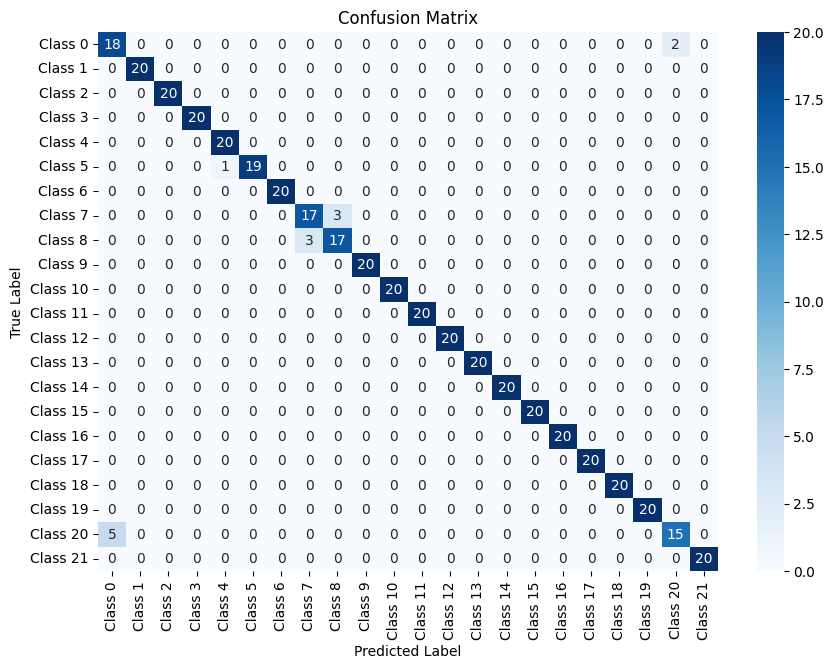

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you've already trained your model and have y_test and y_pred from previous steps

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(len(crop_dict))],
            yticklabels=[f'Class {i}' for i in range(len(crop_dict))])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle
pickle.dump(randclf, open('cropmodel.pkl', 'wb'))
# pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))

In [ ]:

# Define recommendation function
def recommendation(N, P, K, humidity, ph, temperature_category, rainfall_category):
    # Convert categories back to numeric values
    temperature_dict = {
        'Cool': 10,
        'Mild': 15,
        'Warm': 20,
        'Hot': 25,
        'Very Hot': 30,
        'Extreme Heat': 35
    }

    rainfall_dict = {
        'No Rain': 0,
        'Light Rain': 1,
        'Moderate Rain': 5,
        'Heavy Rain': 10,
        'Very Heavy Rain': 20,
        'Extreme Rain': 30
    }

    # Get the numeric values for temperature and rainfall
    temperature = temperature_dict.get(temperature_category, 0)  # Default to 0 if not found
    rainfall = rainfall_dict.get(rainfall_category, 0)  # Default to 0 if not found

    features = np.array([[N, P, K, humidity, ph, temperature, rainfall]])
    mx_features = scaler.transform(features)  # Use the scaler to transform
    prediction = randclf.predict(mx_features).reshape(1, -1)
    label_name = {v: k for k, v in crop_dict.items()}[prediction[0][0]]  # Convert numeric back to label
    return label_name


In [ ]:
pip install gradio

In [ ]:
import numpy as np
import gradio as gr
# Gradio interface
interface = gr.Interface(
    fn=recommendation,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorus (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Humidity"),
        gr.Number(label="pH"),
        gr.Radio(label="Temperature Category", choices=[
            'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot', 'Extreme Heat'
        ], type="value"),  # User can select temperature category
        gr.Radio(label="Rainfall Category", choices=[
            'No Rain', 'Light Rain', 'Moderate Rain',
            'Heavy Rain', 'Very Heavy Rain', 'Extreme Rain'
        ], type="value")   # User can select rainfall category
    ],
    outputs="text",  # Specify "text" as the correct output type
    live=True
)

# Launch the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://92ff72d558d8c70730.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
